##ThinkDSP

This notebook contains code examples from Chapter 11: Modulation and samplimg

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [445]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import math
import numpy as np
import pandas
import scipy.signal

import matplotlib.pyplot as pyplot

PI2 = 2 * math.pi

%precision 3
%matplotlib inline

In [3]:
reload(thinkdsp)
wave = thinkdsp.read_wave('105977__wcfl10__favorite-station.wav')
wave.unbias()
wave.normalize()
wave.make_audio()

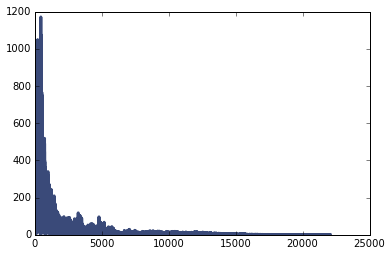

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()

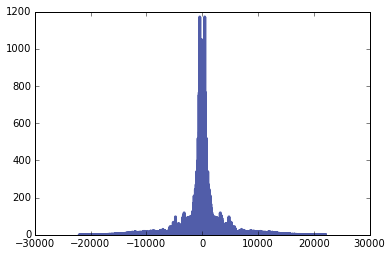

In [5]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

In [6]:
wave.duration

2.809614512471655

In [7]:
carrier_sig = thinkdsp.CosSignal(freq=10000)
carrier_wave = carrier_sig.make_wave(duration=wave.duration, framerate=wave.framerate)

In [8]:
modulated = wave * carrier_wave

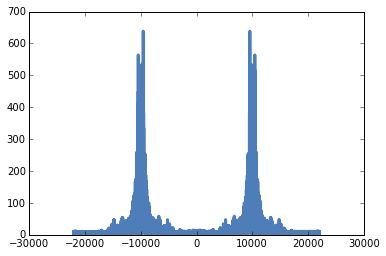

In [9]:
modulated.make_spectrum(full=True).plot()

In [10]:
modulated.make_audio()

In [11]:
demodulated = modulated * carrier_wave

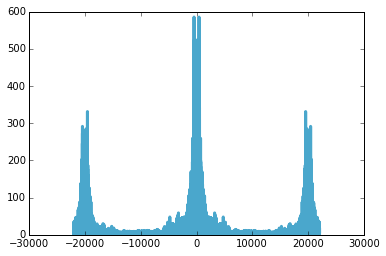

In [12]:
demodulated_spectrum = demodulated.make_spectrum(full=True)
demodulated_spectrum.plot()

In [13]:
demodulated.make_audio()

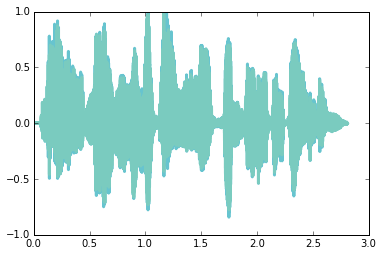

In [14]:
wave.plot()
demodulated.plot()

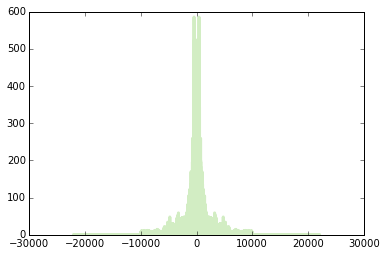

In [15]:
demodulated_spectrum.low_pass(10000)
demodulated_spectrum.plot()

In [16]:
filtered = demodulated_spectrum.make_wave()
filtered.make_audio()

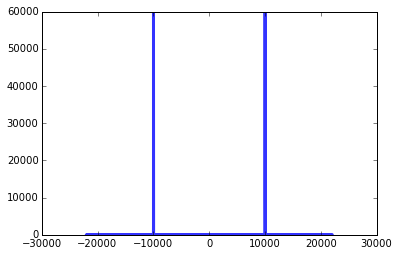

In [17]:
carrier_spectrum = carrier_wave.make_spectrum(full=True)
carrier_spectrum.plot()

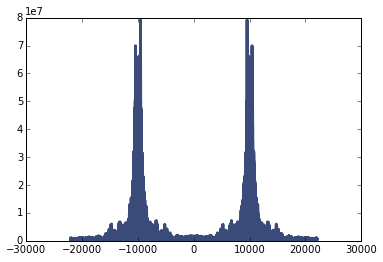

In [18]:
convolved = spectrum.convolve(carrier_spectrum)
convolved.plot()

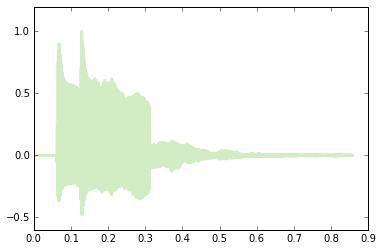

In [249]:
reload(thinkdsp)
wave = thinkdsp.read_wave('253887__themusicalnomad__positive-beeps.wav')
wave.normalize()
wave.plot()

In [250]:
wave.make_audio()

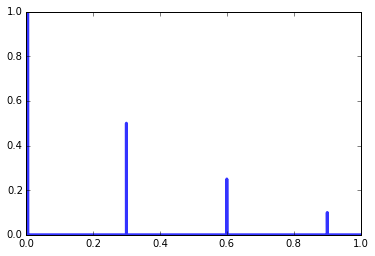

In [251]:
reload(thinkdsp)
imp_sig = thinkdsp.Impulses([0.005, 0.3, 0.6, 0.9], amps=[1, 0.5, 0.25, 0.1])
impulses = imp_sig.make_wave(start=0, duration=1.0, framerate=wave.framerate)
impulses.plot()

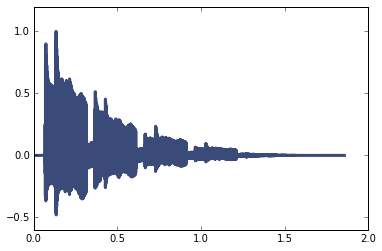

In [252]:
convolved = wave.convolve(impulses)
convolved.plot()

In [253]:
convolved.make_audio()

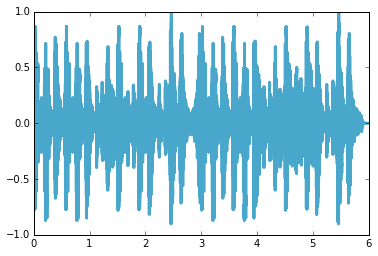

In [653]:
reload(thinkdsp)
wave = thinkdsp.read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()

In [654]:
wave.make_audio()

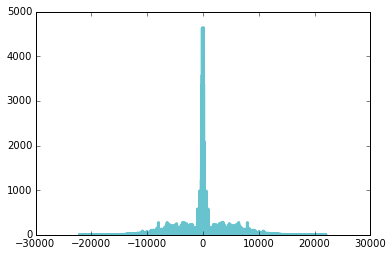

In [655]:
wave.make_spectrum(full=True).plot()

In [656]:
def make_impulses(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = 1
    ts = np.arange(len(wave)) / wave.framerate
    return thinkdsp.Wave(ys, ts, wave.framerate)

impulses = make_impulses(wave, 4)

In [657]:
sampled = wave * impulses
sampled.make_audio()

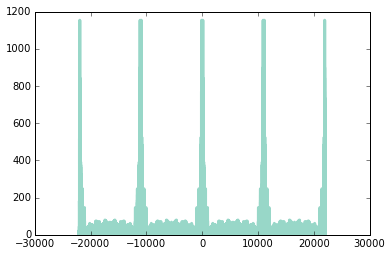

In [658]:
sampled.make_spectrum(full=True).plot()

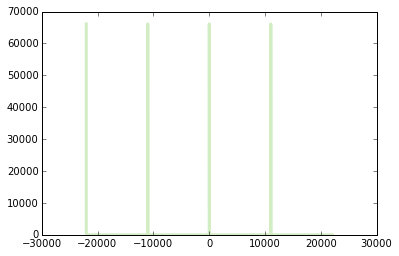

In [659]:
impulses.make_spectrum(full=True).plot()

In [660]:
def make_boxcar(spectrum, cutoff):
    fs = np.copy(spectrum.fs)
    hs = np.zeros_like(spectrum.hs)
    for i, f in enumerate(fs):
        if abs(f) <= cutoff:
            hs[i] = 1
    return thinkdsp.Spectrum(hs, fs, spectrum.framerate, full=spectrum.full)

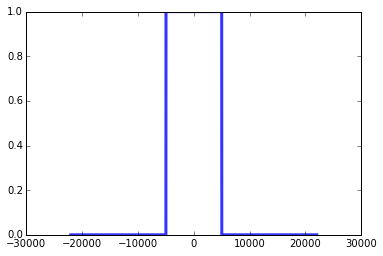

In [661]:
spectrum = sampled.make_spectrum(full=True)
boxcar = make_boxcar(spectrum, 5000)
boxcar.plot()

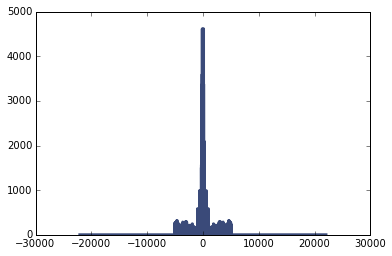

In [662]:
filtered = (spectrum * boxcar).make_wave()
filtered.scale(4)
filtered.make_spectrum(full=True).plot()

In [663]:
filtered.make_audio()

In [664]:
def plot_segments(original, interpolated):
    start = 1
    duration = 0.01
    original.segment(start=start, duration=duration).plot(color='gray')
    interpolated.segment(start=start, duration=duration).plot()

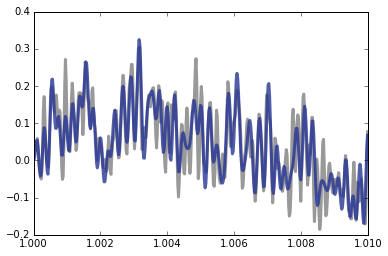

In [665]:
plot_segments(wave, filtered)

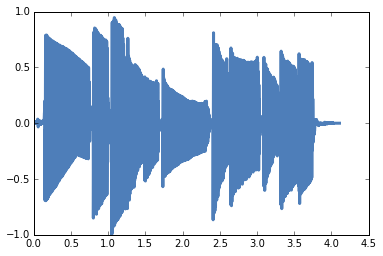

In [666]:
reload(thinkdsp)
wave = thinkdsp.read_wave('328878__tzurkan__guitar-phrase-tzu.wav')
wave.normalize()
wave.plot()

In [667]:
wave.make_audio()

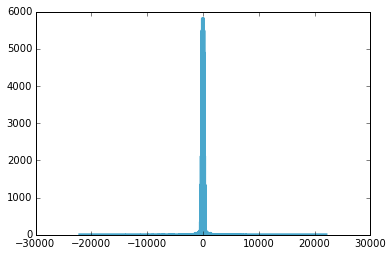

In [668]:
wave.make_spectrum(full=True).plot()

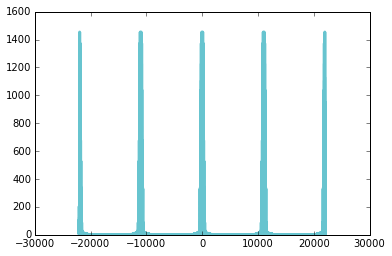

In [669]:
sampled = sample(wave, 4)
sampled.make_spectrum(full=True).plot()

In [670]:
sampled.make_audio()

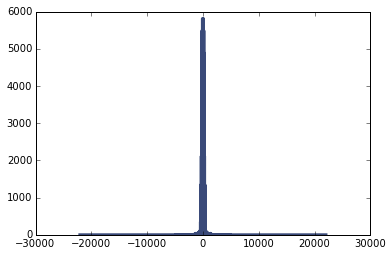

In [675]:
spectrum = sampled.make_spectrum(full=True)
boxcar = make_boxcar(spectrum, 5000)
filtered = (spectrum * boxcar).make_wave()
filtered.scale(4)
filtered.make_spectrum(full=True).plot()

In [676]:
filtered.make_audio()

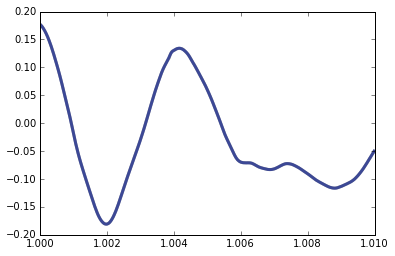

In [677]:
plot_segments(wave, filtered)

0.006

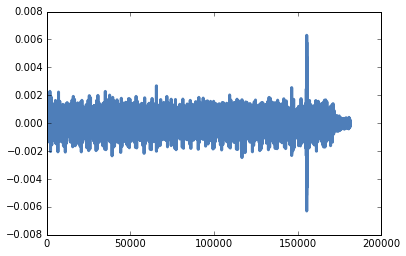

In [679]:
diff = wave.ys - filtered.ys
thinkplot.plot(diff)
max(abs(diff))